In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [549]:
df = pd.read_csv('CarPrice.csv')
df.drop(columns=['car_ID','CarName'],inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [550]:
con_col,cate_col = [],[]              #แยก column ที่เป็น เลข กับ category
for i in df.columns:
    if np.issubdtype(df[i],np.number):
        con_col.append(i)
    else:
        cate_col.append(i)
len(con_col)+len(cate_col)
# price เป็น Y
con_col.remove('price')
con_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [551]:
std_scale = preprocessing.StandardScaler()
cor_df = std_scale.fit_transform(df[con_col])
cor_df = pd.DataFrame(cor_df,columns=con_col)
lower = pd.DataFrame(np.tril(cor_df.corr(),-1),columns = cor_df.columns)
to_drop = [column for column in lower.columns if any(lower[column] > 0.86)]
to_drop


['wheelbase', 'carlength', 'carwidth', 'citympg']

In [552]:
cor_df.drop(columns=to_drop,inplace=True)
cor_df

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059


In [553]:
df_encode = pd.get_dummies(data=df[cate_col],columns= cate_col,drop_first=True)
df_encode

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [554]:
#standard เฉพาะ continuous
X_standard = std_scale.fit_transform(cor_df)
X_standard = pd.DataFrame(X_standard,columns=cor_df.columns)
#รวม dataframe continuous(หลังstandardize) กับ category
df_afterEncode = pd.concat([X_standard,df_encode], axis=1, join='inner') 
column_afterEncode_temp = df_afterEncode.columns
df_afterEncode


,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,...,0,0,0,0,0,1,0,0,0,0


Text(0, 0.5, 'Explained variance ratio')

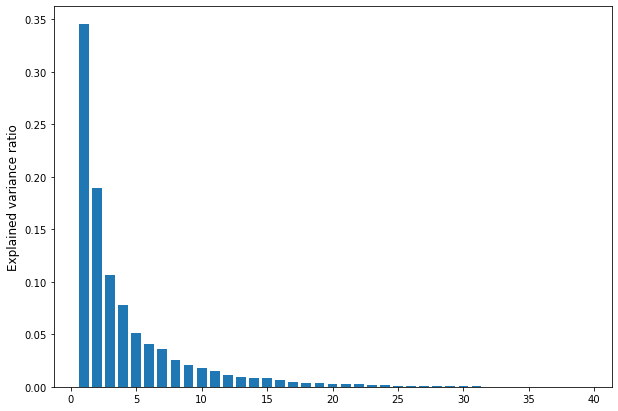

In [555]:
pca = PCA()
X_pca = pca.fit_transform(df_afterEncode)
fig = plt.figure(figsize =(10, 7))
plt.bar([i for i in range(1,len(pca.explained_variance_ratio_)+1)],pca.explained_variance_ratio_,0.75)  #eigen value มี 39 ตัว เพราะมี 39 columns
plt.ylabel("Explained variance ratio",fontsize = 12) 


In [556]:
pca2 = PCA(n_components=5)
X_pca_2 = pca2.fit_transform(X_standard)

In [557]:
#shuffle spilt
Rseed = 55
x_train_set , x_test, y_train_set , y_test = train_test_split(X_standard,df['price'],test_size= 0.3,random_state= Rseed)
x_train,x_validate,y_train,y_validate =     train_test_split(x_train_set,y_train_set,test_size=0.3 ,random_state= Rseed)


In [558]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test)

In [559]:
no_pca_r2_valid = r2_score(y_pred_lr,y_validate)
no_pca_r2_test = r2_score(y_test_pred_lr,y_test)
no_pca_mse_valid = mean_squared_error(y_pred_lr,y_validate)
no_pca_mse_test = mean_squared_error(y_test_pred_lr,y_test)
print(no_pca_r2_valid)    
print(no_pca_r2_test)  
print(no_pca_mse_valid)   
print(no_pca_mse_test)

0.8119642893298917
0.6426119656429676
14703784.222761376
12235639.57005404


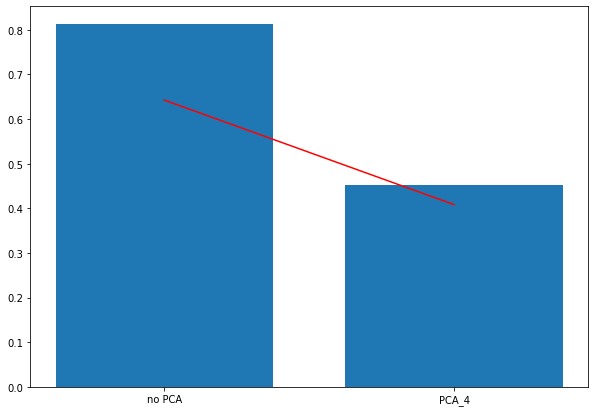

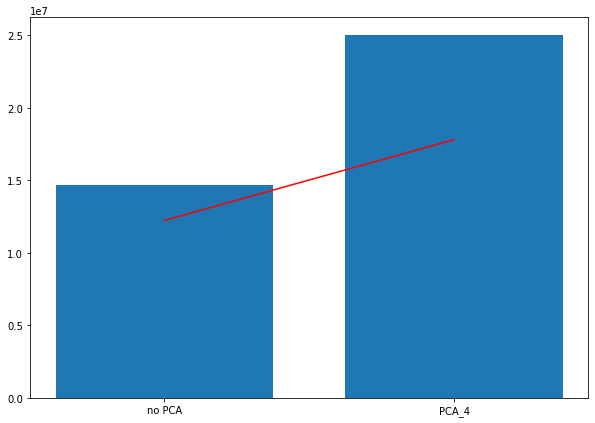

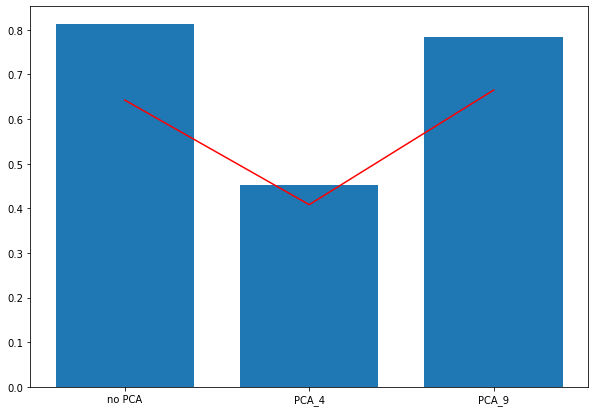

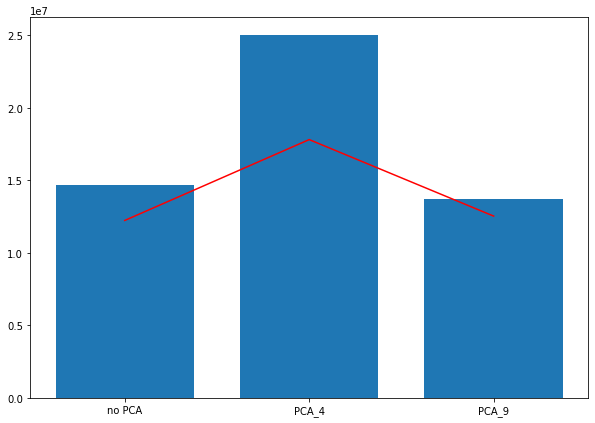

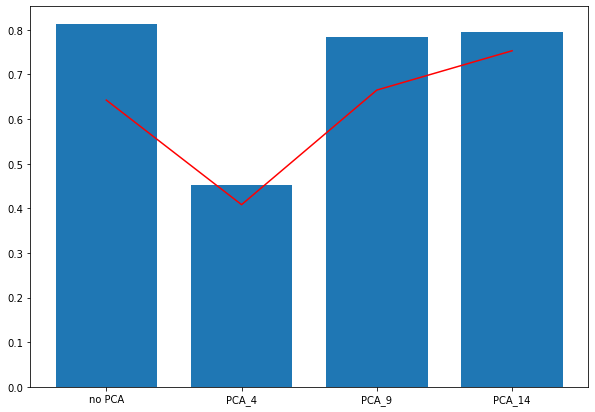

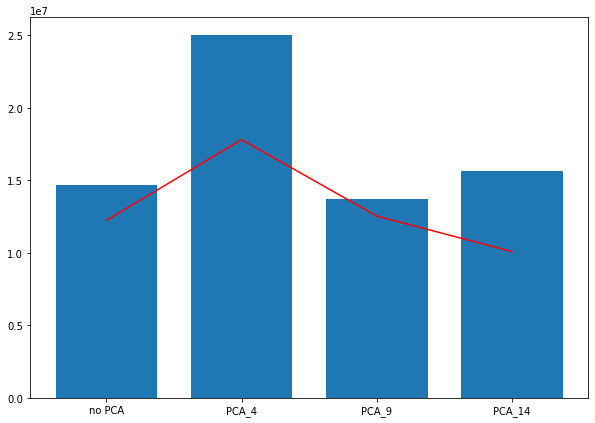

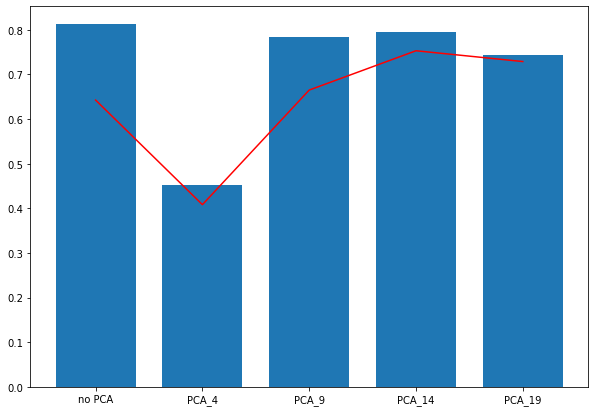

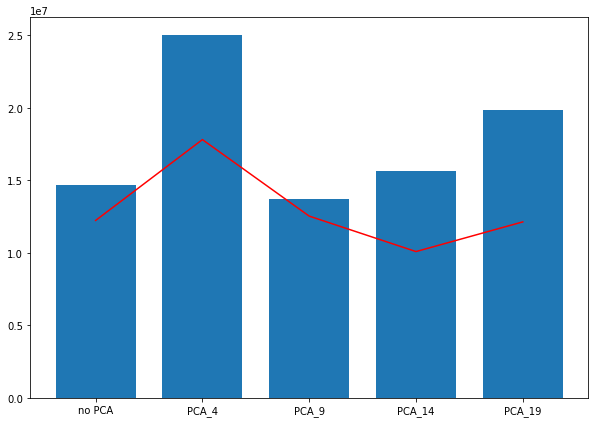

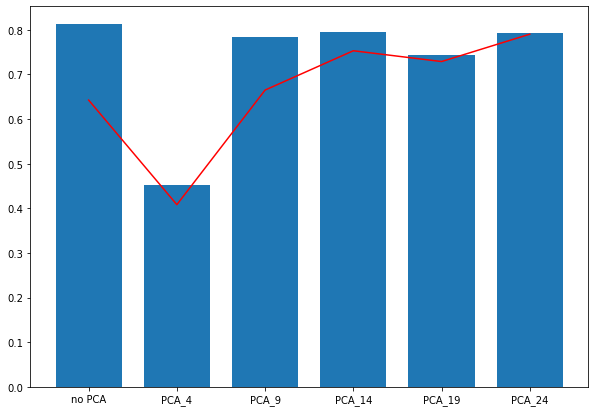

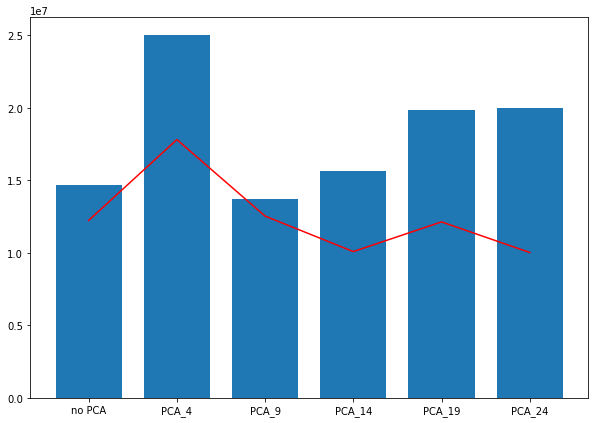

In [560]:
r2_valid_score = [no_pca_r2_valid]
r2_test_score = [no_pca_r2_test]
mse_valid_score = [no_pca_mse_valid]
mse_test_score = [no_pca_mse_test]
score_labelx = ['no PCA']
x_pca_list = []
n_compo = []
for i in range (4,25,5):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df_afterEncode)
    x_pca_list.append(X_pca)
    n_compo.append(i)
   
for i in range (0,len(x_pca_list)):  
    x_train_set , x_test, y_train_set , y_test  =     train_test_split(x_pca_list[i],df['price'],test_size= 0.3,random_state= Rseed) 
    x_train,x_validate,y_train,y_validate       =     train_test_split(x_train_set,y_train_set,test_size=0.3,random_state= Rseed) 
    lr = LinearRegression()    
    lr.fit(x_train, y_train)
    y_pred_lr       =   lr.predict(x_validate)      # valid y_pred_lr       y_validate
    y_test_pred_lr  =   lr.predict(x_test)     # test  y_test_pred_lr  y_test
        # print(f'r2_pred  = {r2_score(y_pred_lr,y_validate)}')    
        # print(f'r2_test  = {r2_score(y_test_pred_lr,y_test)}')  # y_test_pred_lr ค่าที่ได้จาก model  , y_test ค่าที่แยกไว้ test
        # print(f'mse_pred = {mean_squared_error(y_pred_lr,y_validate)}')   
        # print(f'mse_test = {mean_squared_error(y_test_pred_lr,y_test)}')
        # print(f'n_component = {n_compo[i]}')
        # print('--------------------------------------')

    r2_valid_score.append(r2_score(y_pred_lr,y_validate))
    r2_test_score.append(r2_score(y_test_pred_lr,y_test))
    mse_valid_score.append(mean_squared_error(y_pred_lr,y_validate))
    mse_test_score.append (mean_squared_error(y_test_pred_lr,y_test))
    score_labelx.append(f'PCA_{n_compo[i]}')        
    fig = plt.figure(figsize =(10, 7))
    plt.bar(score_labelx,r2_valid_score,0.75)
    plt.plot(r2_test_score,color='r')

    fig = plt.figure(figsize =(10, 7))
    plt.bar(score_labelx,mse_valid_score,0.75)
    plt.plot(mse_test_score,color='r')

    # score_labelx.clear()
    # r2_test_score.clear()
    # r2_valid_score.clear()
    # mse_test_score.clear()
    # mse_valid_score.clear()



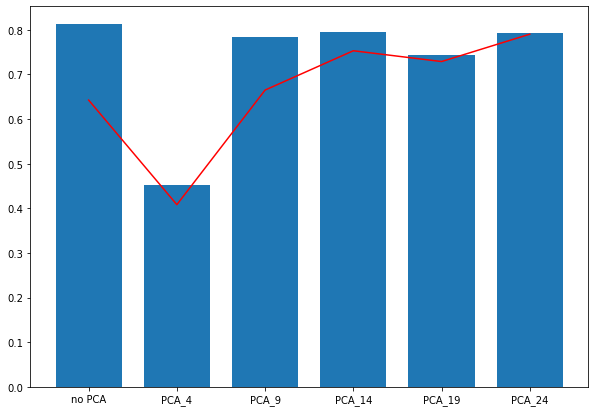

In [561]:
fig = plt.figure(figsize =(10, 7))
plt.bar(score_labelx,r2_valid_score ,0.75)
plt.plot(r2_test_score,color='r')

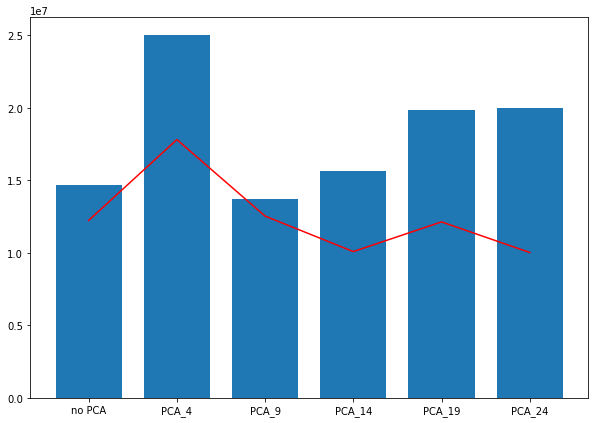

In [562]:
fig = plt.figure(figsize =(10, 7))
plt.bar(score_labelx, mse_valid_score,0.75)
plt.plot(mse_test_score,color='r')